# Predictive Thyroid Disease Project - EDA

To make a predictive model where you input factors of a person and have it predict if they are likely to have thyroid disease or not. The accuracy has to be above 95% to be considered successful.

# Initial Set Up

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

In [3]:
# load the cleaned data

df = pd.read_csv("Thyroid_Diff_cleaned.csv")

In [7]:
# Display number of rows, column names, and column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    int64 
 2   Smoking               383 non-null    int64 
 3   Hx_Smoking            383 non-null    int64 
 4   Hx_Radiotherapy       383 non-null    int64 
 5   Thyroid_Function      383 non-null    object
 6   Physical_Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    int64 
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    int64 
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [8]:
# Display the first few rows
df.head()

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiotherapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurrence
0,27,0,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,1,Low,T1a,N0,0,I,Indeterminate,0
1,34,0,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,1,Low,T1a,N0,0,I,Excellent,0
2,30,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,Low,T1a,N0,0,I,Excellent,0
3,62,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,Low,T1a,N0,0,I,Excellent,0
4,62,0,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,0,Low,T1a,N0,0,I,Excellent,0


In [9]:
# Display the last few rows
df.tail()

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiotherapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurrence
378,72,1,1,1,1,Euthyroid,Single nodular goiter-right,Right,Papillary,1,High,T4b,N1b,1,IVB,Biochemical Incomplete,1
379,81,1,1,0,1,Euthyroid,Multinodular goiter,Extensive,Papillary,0,High,T4b,N1b,1,IVB,Structural Incomplete,1
380,72,1,1,1,0,Euthyroid,Multinodular goiter,Bilateral,Papillary,0,High,T4b,N1b,1,IVB,Structural Incomplete,1
381,61,1,1,1,1,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,0,High,T4b,N1b,0,IVA,Structural Incomplete,1
382,67,1,1,0,0,Euthyroid,Multinodular goiter,Bilateral,Papillary,0,High,T4b,N1b,0,IVA,Structural Incomplete,1


In [10]:
# Display random sample

df.sample(n=5, random_state=42)

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiotherapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurrence
268,32,0,0,0,0,Euthyroid,Single nodular goiter-left,No,Papillary,1,Low,T3a,N0,0,I,Excellent,0
250,30,0,0,0,0,Subclinical Hypothyroidism,Normal,Right,Follicular,1,Low,T3a,N0,0,I,Excellent,0
318,30,0,0,0,0,Euthyroid,Multinodular goiter,Bilateral,Papillary,0,Intermediate,T3a,N1b,0,I,Structural Incomplete,1
331,51,0,0,0,0,Euthyroid,Single nodular goiter-left,No,Follicular,1,Intermediate,T3a,N0,0,I,Structural Incomplete,1
56,43,0,0,1,0,Euthyroid,Single nodular goiter-right,No,Papillary,1,Low,T1b,N0,0,I,Excellent,0


# Visualizing Outliers if have any

In [13]:
# removed outliers in the data wrangling step but just in case

In [17]:
def visualize_outliers(df, col_name):
    plt.figure(figsize=(6, 4))  # Adjusted size for a smaller plot
    sns.boxplot(
        x=df[col_name], 
        whis=1.5, 
        showmeans=True,  # Optional to show mean as a dot
        flierprops={"marker": "o", "color": "red", "markersize": 5}  # Style for outliers
    )
    plt.title(f'Box-and-Whisker Plot for {col_name}', fontsize=14)
    plt.xlabel(col_name, fontsize=12)
    plt.show()

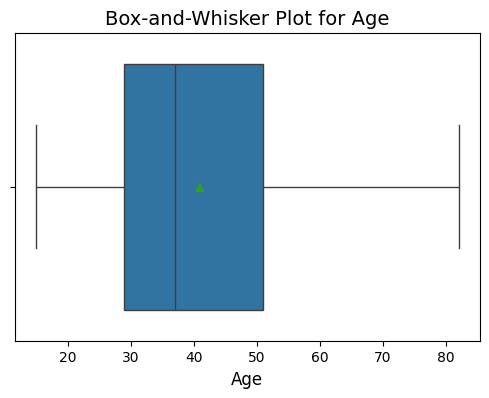

In [18]:
# Doing the age column as the only continous value column
visualize_outliers(df, 'Age')
# there are no outliers in the age column 
# reminder for me,
    # the line in the box is the median
    # the green triangle is the mean

# Univariate Analysis

In [21]:
# Descriptive statistics for numerical columns in entire df

df.describe()
# asking for descriptive stat on the entire df 
# Age is the only column with continuous value so descriptive analysis will work better on it
# the other columns that appear are using binary 1 and 0 which can work somewhat with descriptive stat

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiotherapy,Focality,M,Recurrence
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,40.866841,0.185379,0.127937,0.073107,0.018277,0.644909,0.046997,0.281984
std,15.134494,0.389113,0.334457,0.260653,0.134126,0.479167,0.211910,0.450554
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


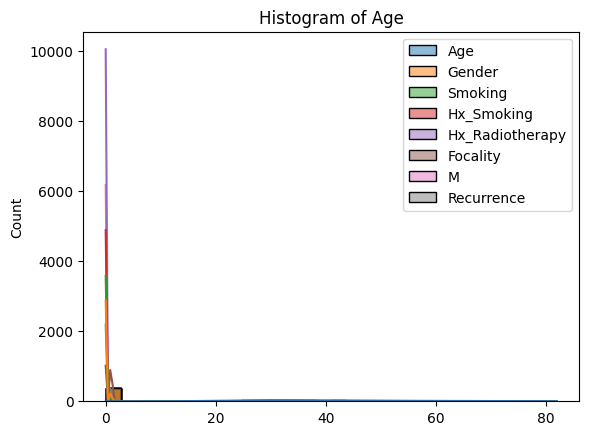

In [27]:
# Histogram for numerical columns in entire df

sns.histplot(df, kde=True, bins=30)  # Adjust column name
plt.title('Histogram of Age')
plt.show()

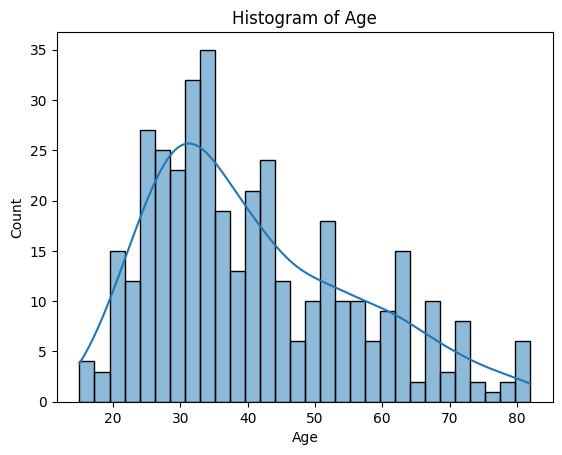

In [28]:
sns.histplot(df['Age'], kde=True, bins=30)  # Adjust column name
plt.title('Histogram of Age')
plt.show()

C:\Users\aero9\AppData\Local\Temp\ipykernel_73380\3097727819.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], shade=True)


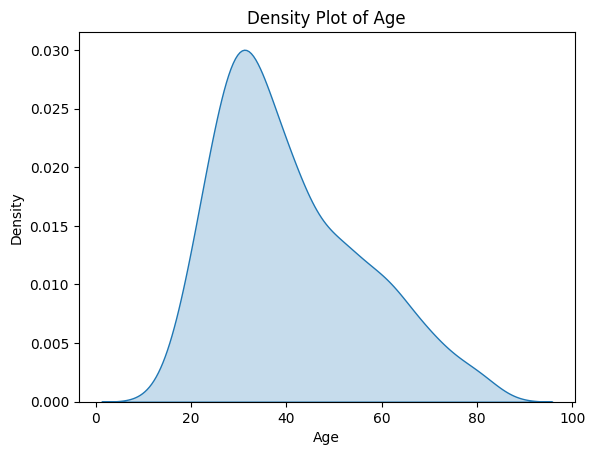

In [30]:
# Density plot for a numerical column
sns.kdeplot(df['Age'], shade=True)
plt.title('Density Plot of Age')
plt.show()


In [ ]:
# Scatter plot between two numerical variables
sns.scatterplot(x=df['Age'], y=df['income'])
plt.title('Age vs Income')
plt.show()
